In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
from google.colab import drive
drive.flush_and_unmount()


In [2]:
!pip install -q keras

In [3]:
import keras

In [60]:
from keras.utils.vis_utils import plot_model


In [51]:
from keras.applications.nasnet import NASNetMobile, NASNetLarge
from keras.applications.inception_resnet_v2 import InceptionResNetV2


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras import layers,models
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
base_path = '/content/drive/MyDrive/Hack1'
base_path_1 = '/content/drive/MyDrive/Hack1/train'
base_path_labels = '/content/drive/MyDrive/Hack1/train.csv'


In [8]:
df = pd.read_csv(base_path_labels)
df.head

<bound method NDFrame.head of               Image           Class
0     image3476.jpg   Miscellaneous
1     image5198.jpg          Candle
2     image4183.jpg         Snowman
3     image1806.jpg   Miscellaneous
4     image7831.jpg   Miscellaneous
...             ...             ...
6464  image2096.jpg  Christmas_Tree
6465  image1474.jpg   Miscellaneous
6466  image4124.jpg        Airplane
6467  image7695.jpg          Candle
6468  image3428.jpg        Airplane

[6469 rows x 2 columns]>

In [9]:
df.head

<bound method NDFrame.head of               Image           Class
0     image3476.jpg   Miscellaneous
1     image5198.jpg          Candle
2     image4183.jpg         Snowman
3     image1806.jpg   Miscellaneous
4     image7831.jpg   Miscellaneous
...             ...             ...
6464  image2096.jpg  Christmas_Tree
6465  image1474.jpg   Miscellaneous
6466  image4124.jpg        Airplane
6467  image7695.jpg          Candle
6468  image3428.jpg        Airplane

[6469 rows x 2 columns]>

In [10]:
datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input)

In [11]:
image_names  =  df.iloc[:,0].values
label= df.iloc[:,1].values
final_labels = {}
for i in range(len(image_names)):
  final_labels[image_names[i]] = label[i]
final_labels

{'image3476.jpg': 'Miscellaneous',
 'image5198.jpg': 'Candle',
 'image4183.jpg': 'Snowman',
 'image1806.jpg': 'Miscellaneous',
 'image7831.jpg': 'Miscellaneous',
 'image537.jpg': 'Airplane',
 'image9774.jpg': 'Christmas_Tree',
 'image5365.jpg': 'Airplane',
 'image9367.jpg': 'Christmas_Tree',
 'image4819.jpg': 'Christmas_Tree',
 'image4191.jpg': 'Miscellaneous',
 'image6764.jpg': 'Jacket',
 'image8345.jpg': 'Miscellaneous',
 'image3198.jpg': 'Christmas_Tree',
 'image7076.jpg': 'Airplane',
 'image2257.jpg': 'Christmas_Tree',
 'image7771.jpg': 'Miscellaneous',
 'image7391.jpg': 'Snowman',
 'image8473.jpg': 'Miscellaneous',
 'image4470.jpg': 'Miscellaneous',
 'image9387.jpg': 'Miscellaneous',
 'image9663.jpg': 'Miscellaneous',
 'image7431.jpg': 'Miscellaneous',
 'image5324.jpg': 'Christmas_Tree',
 'image8148.jpg': 'Miscellaneous',
 'image7418.jpg': 'Miscellaneous',
 'image883.jpg': 'Christmas_Tree',
 'image7397.jpg': 'Jacket',
 'image9505.jpg': 'Christmas_Tree',
 'image6056.jpg': 'Miscella

In [12]:
print (len(image_names))

6469


In [13]:
X_train =[]
y_train = []
for image in tqdm(os.listdir(base_path_1)):
  img = cv2.imread(os.path.join(base_path_1,image))
  img = cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)
  img = preprocess_input(img.reshape(1,224,224,3))
  X_train.append(img.reshape(224,224,3))
  y_train.append(final_labels[image])

100%|██████████| 6469/6469 [35:57<00:00,  3.00it/s]


In [16]:
print(y_train)

['Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneous', 'Miscellaneou

In [17]:
train_generator = datagen.flow_from_dataframe(
    df,
    directory = '/content/drive/MyDrive/Hack1/train',
    x_col = 'Image',
    y_col = 'Class',
    target_size = (299, 299),
    class_mode = 'categorical',
    batch_size = 32)

Found 6469 validated image filenames belonging to 6 classes.


In [18]:
holidayModel = InceptionV3(include_top = False, weights = 'imagenet', input_shape = (299,299,3))


87916544/87910968 [==============================] - 1s 0us/step


In [52]:
holidayModel_1 = InceptionResNetV2(include_top = False, weights = 'imagenet', input_shape = (299,299,3))


219062272/219055592 [==============================] - 2s 0us/step


In [19]:
holidayModel.trainable = False

In [53]:
holidayModel_1.trainable = False

In [21]:
model = models.Sequential()
model.add(holidayModel)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))

In [54]:
model_1 = models.Sequential()
model_1.add(holidayModel_1)
model_1.add(layers.GlobalAveragePooling2D())
model_1.add(layers.Dense(512,activation='relu'))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(256,activation='relu'))
model_1.add(layers.Dense(6,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 1542      
Total params: 22,984,742
Trainable params: 1,181,958
Non-trainable params: 21,802,784
__________________________________

In [55]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1536)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               786944    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1542      
Total params: 55,256,550
Trainable params: 919,814
Non-trainable params: 54,336,736
____________________________________

In [24]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [57]:
model_1.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [25]:
train_steps = np.ceil(train_generator.n/train_generator.batch_size)


In [26]:

model.fit(
    train_generator,
    epochs = 12,
    batch_size = 32,
    steps_per_epoch = train_steps)

Epoch 1/12
203/203 [==============================] - 37s 127ms/step - loss: 0.9097 - accuracy: 0.6888
Epoch 2/12
203/203 [==============================] - 27s 132ms/step - loss: 0.3613 - accuracy: 0.8744
Epoch 3/12
203/203 [==============================] - 26s 127ms/step - loss: 0.3327 - accuracy: 0.8880
Epoch 4/12
203/203 [==============================] - 28s 136ms/step - loss: 0.3501 - accuracy: 0.8787
Epoch 5/12
203/203 [==============================] - 27s 133ms/step - loss: 0.2693 - accuracy: 0.9037
Epoch 6/12
203/203 [==============================] - 27s 131ms/step - loss: 0.2418 - accuracy: 0.9147
Epoch 7/12
203/203 [==============================] - 27s 131ms/step - loss: 0.2350 - accuracy: 0.9116
Epoch 8/12
203/203 [==============================] - 27s 132ms/step - loss: 0.2242 - accuracy: 0.9186
Epoch 9/12
203/203 [==============================] - 27s 131ms/step - loss: 0.2167 - accuracy: 0.9154
Epoch 10/12
203/203 [==============================] - 27s 131ms/step - l

In [58]:
model_1.fit(
    train_generator,
    epochs = 12,
    batch_size = 32,
    steps_per_epoch = train_steps)

Epoch 1/12
203/203 [==============================] - 74s 322ms/step - loss: 0.8789 - accuracy: 0.7070
Epoch 2/12
203/203 [==============================] - 67s 329ms/step - loss: 0.3526 - accuracy: 0.8848
Epoch 3/12
203/203 [==============================] - 67s 328ms/step - loss: 0.3086 - accuracy: 0.8905
Epoch 4/12
203/203 [==============================] - 67s 328ms/step - loss: 0.2848 - accuracy: 0.9009
Epoch 5/12
203/203 [==============================] - 67s 327ms/step - loss: 0.2546 - accuracy: 0.9126
Epoch 6/12
203/203 [==============================] - 67s 328ms/step - loss: 0.2595 - accuracy: 0.9073
Epoch 7/12
203/203 [==============================] - 67s 329ms/step - loss: 0.2334 - accuracy: 0.9176
Epoch 8/12
203/203 [==============================] - 67s 328ms/step - loss: 0.2229 - accuracy: 0.9182
Epoch 9/12
203/203 [==============================] - 67s 329ms/step - loss: 0.2205 - accuracy: 0.9204
Epoch 10/12
203/203 [==============================] - 67s 328ms/step - l

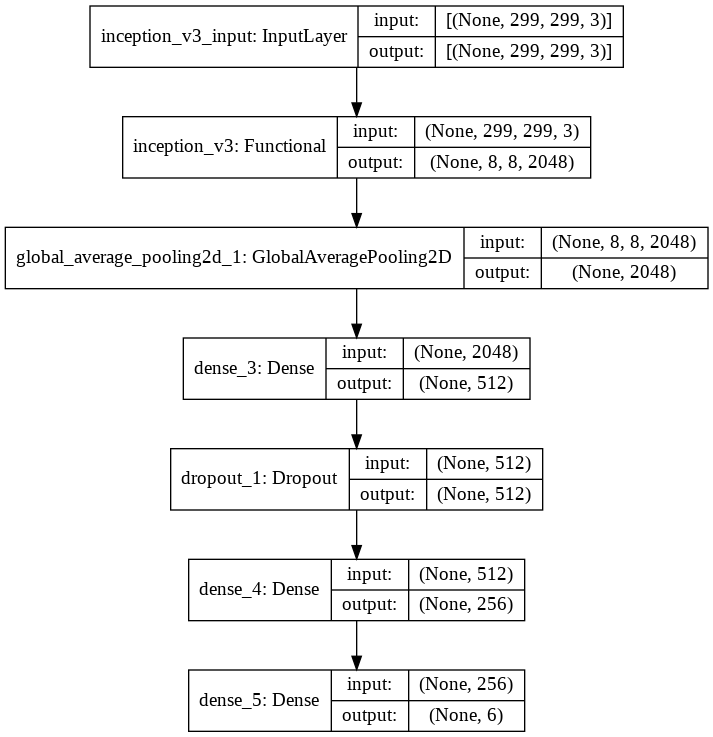

In [61]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [74]:
test_df = pd.DataFrame()
test_images = os.listdir('/content/drive/MyDrive/Hack1/test')
test_df['Image'] = test_images
test_df.head()

,Image
0,image1097.jpg
1,image1080.jpg
2,image108.jpg
3,image1095.jpg
4,image1073.jpg


In [75]:
len(test_images)

70

In [69]:
test_generator = datagen.flow_from_dataframe(
    test_df,
    directory = '/content/drive/MyDrive/Hack1/test',
    x_col = 'Image',
    y_col = None,
    target_size = (299, 299),
    class_mode = None,
    batch_size = 32,
    shuffle = False )

Found 70 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 3439 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [70]:
test_steps = np.ceil(test_generator.n / test_generator.batch_size)


In [73]:
pred = model.predict_generator(
    test_generator,
    steps = test_steps,
    verbose = 1 )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3/3 [==============================] - 1s 338ms/step


In [72]:
pred_1 = model_1.predict_generator(
    test_generator,
    steps = test_steps,
    verbose = 1 )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3/3 [==============================] - 1s 320ms/step


In [32]:
pred = np.argmax(pred,axis = -1)


In [33]:
pred

array([4, 4, 4, ..., 0, 0, 0])

In [41]:
len(pred)

3509

In [ ]:
len()

In [34]:
test_df['Class'] = pred


In [37]:
num_to_class = dict((y,x) for (x,y) in train_generator.class_indices.items())
num_to_class

{0: 'Airplane',
 1: 'Candle',
 2: 'Christmas_Tree',
 3: 'Jacket',
 4: 'Miscellaneous',
 5: 'Snowman'}

In [38]:
test_df['Class'] = test_df['Class'].map(num_to_class)
test_df.head()

,Image,Class
0,image7473.jpg,Miscellaneous
1,image3697.jpg,Miscellaneous
2,image3564.jpg,Miscellaneous
3,image444.jpg,Miscellaneous
4,image7908.jpg,Miscellaneous


In [40]:
test_df.to_csv('/content/drive/MyDrive/Hack1/Myattempt.csv', index = False)
